<a href="https://colab.research.google.com/github/ameliagarciarond22-source/Modelos-Estoc-sticos-/blob/main/Caminata_Aleatoria_1D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Caminatas al azar

Tenemos un punto que se puede mover a la derecha con probabilidad $p$ y a la izquierda con probabilidad $q$, tal que $p+q = 1$

Probabilidad estimada de regreso: 0.892
Tiempo promedio de primer regreso: 7.174887892376682
Alejamiento promedio: 6.7687600000000065
Alejamiento máximo promedio: 14.878


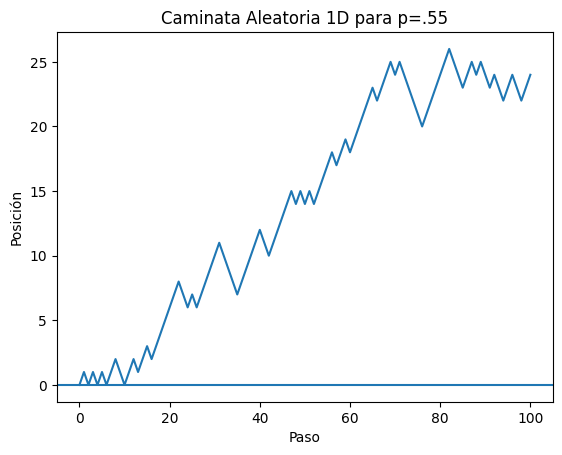

In [32]:
import random as rd
import matplotlib.pyplot as ptl

def caminata(p, n):
  posicion = 0
  trayectoria = [posicion]
  tiempo_regreso = None
  suma_distancias = 0
  maximo = 0

  for i in range(1, n+1):
    if rd.random() <= p:
      posicion += 1
    else:
      posicion -= 1

    trayectoria.append(posicion)

    if posicion == 0 and tiempo_regreso is None:
      tiempo_regreso = i

    suma_distancias += abs(posicion)

    if abs(posicion) > maximo:
      maximo = abs(posicion)

  distancia_promedio = suma_distancias / n

  return trayectoria, tiempo_regreso, distancia_promedio, maximo


p = 0.55
n = 100
repeticiones = 1000

regresos = 0
suma_tiempos = 0
suma_distancias = 0
suma_maximos = 0

for r in range(repeticiones):
  trayectoria, tiempo, dist_prom, maximo = caminata(p, n)


  if r == repeticiones - 1:
    trayectoria_final = trayectoria

  if tiempo is not None:
    regresos += 1
    suma_tiempos += tiempo

  suma_distancias += dist_prom
  suma_maximos += maximo


print("Probabilidad estimada de regreso:", regresos/repeticiones)

if regresos > 0:
  print("Tiempo promedio de primer regreso:", suma_tiempos/regresos)
else:
  print("No hubo regresos")

print("Alejamiento promedio:", suma_distancias/repeticiones)
print("Alejamiento máximo promedio:", suma_maximos/repeticiones)


# --------- GRÁFICA ---------
ptl.plot(trayectoria_final)
ptl.title("Caminata Aleatoria 1D para p=.55")
ptl.xlabel("Paso")
ptl.ylabel("Posición")
ptl.axhline(0)
ptl.show()


#¿Regresa al origen?

De la simulación se obtuvo:

$$
\text{Probabilidad estimada de regreso} = 0.892
$$

Esto significa que aproximadamente el 89.2\% de las caminatas regresaron al origen al menos una vez.

Ahora, viendo los cálculos teóricos:

Sabemos que:
$$
p = 0.55, \qquad q = 0.45
$$

Como:
$$
p > q
$$

Existe una tendencia hacia la derecha.

En una caminata aleatoria 1D, cuando $p \neq 0.5$, la probabilidad de regresar al origen ya no es 1.  
De hecho, cuando $p > q$, la probabilidad de regresar es:

$$
\frac{q}{p} = \frac{0.45}{0.55} \approx 0.818
$$

Por lo tanto, sí regresa con alta probabilidad, pero no siempre, porque hay una ligera tendencia hacia arriba en la gráfica.

## En promedio, ¿en cuánto tiempo regresa?

El tiempo promedio que se obtuvo fue:

$$
7.17 \text{ pasos}
$$

Esto es que cuando la caminata sí regresa al origen, normalmente lo hace bastante rápido.

Ahora sabemos que:
$$
p = 0.55, \qquad q = 0.45
$$

Entonces la diferencia entre probabilidades es:

$$
p - q = 0.55 - 0.45 = 0.10
$$

En cada paso existe una pequeña ventaja de 0.10 hacia la derecha.

También sabemos que el valor esperado después de $n$ pasos es:

$$
E(X_n) = n(p - q)
$$

Para $n = 100$:

$$
E(X_{100}) = 100(0.10) = 10
$$

Esto explica por qué la caminata termina 10 unidades a la derecha, lo cual nos dice por qué no siempre regresa.  
Cuando regresa lo hace temprano; después de varios pasos, la tendencia es alejarse.

Por eso el promedio de 7.17 pasos tiene sentido: si va a regresar, lo hace antes de que la ventaja acumulada hacia la derecha se vuelva grande.

## ¿Cuánto se aleja en promedio del origen?

Alejamiento promedio:
$$
6.77
$$

Alejamiento máximo promedio:
$$
14.88
$$

Esto significa que, en promedio, la caminata suele estar a unos 6--7 pasos del origen. En su punto más extremo, suele llegar hasta unos 15 pasos de distancia.

En la gráfica se muestra que:

- La trayectoria empieza en 0.  
- Poco a poco va subiendo.  
- Tiene pequeñas bajadas, pero la tendencia general es creciente.  
- Termina cerca de 23--25.

Eso ocurre porque la ventaja acumulada:

$$
100(0.10) = 10
$$

hace que con el tiempo la caminata tienda a moverse hacia la derecha.

## ¿Este proceso es una cadena de Markov?

Claro que es una cadena de Markov porque cumple la propiedad de Markov: el futuro depende solo del presente.

$$
P(X_{n+1} \mid X_n, X_{n-1}, \dots, X_0) = P(X_{n+1} \mid X_n)
$$

Es decir, el siguiente movimiento solo depende de la posición actual, no de cómo llegó ahí.

